In [28]:
import os
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from num2words import num2words
from collections import Counter
import csv
import tf_idf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
import json
from tqdm import tqdm
import pandas as pd
dataset1=[]
dataset=[]
#dataset1: the whole dataset
#dataset: minimized version containing 3 books
#0:wikipediaId 1:fiebaseId 2:name 3:author 4:publish date 5:genres 6:summary


In [1]:
with open('D:\\SDP/repo/book_summarization/booksummaries.txt', 'r', encoding="utf8", errors='ignore') as f:
    reader=csv.reader(f,dialect='excel-tab')
    for row in reader:
        dataset.append([row[2],row[5],row[6]])
        
df=pd.DataFrame(dataset,columns=['Name','Genres','Summary'])
df=df.drop(df[df['Genres']==''].index)

NameError: name 'csv' is not defined

In [40]:
df

,Name,Genres,Summary
0,Animal Farm,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,The Plague,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
4,A Fire Upon the Deep,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...
5,All Quiet on the Western Front,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...","The book tells the story of Paul Bäumer, a Ge..."
...,...,...,...
16549,The Third Lynx,"{""/m/06n90"": ""Science Fiction""}",The story starts with former government agent...
16551,Remote Control,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",The series follows the character of Nick Ston...
16555,Transfer of Power,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",The reader first meets Rapp while he is doing...
16556,Decoded,"{""/m/0xdf"": ""Autobiography""}",The book follows very rough chronological ord...


In [41]:
df=df.drop(df[df['Genres']==''].index)
df['Genres']=df['Genres'].apply(lambda x: list(json.loads(x).values())[0])
df

,Name,Genres,Summary
0,Animal Farm,Roman à clef,"Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Science Fiction,"Alex, a teenager living in near-future Englan..."
2,The Plague,Existentialism,The text of The Plague is divided into five p...
4,A Fire Upon the Deep,Hard science fiction,The novel posits that space around the Milky ...
5,All Quiet on the Western Front,War novel,"The book tells the story of Paul Bäumer, a Ge..."
...,...,...,...
16549,The Third Lynx,Science Fiction,The story starts with former government agent...
16551,Remote Control,Thriller,The series follows the character of Nick Ston...
16555,Transfer of Power,Thriller,The reader first meets Rapp while he is doing...
16556,Decoded,Autobiography,The book follows very rough chronological ord...


In [42]:
dfg=df.Genres

x={}
for g in dfg:
    try:
        x[g]=x[g]+1
    except:
        x[g]=1

y=sorted(x.items(), key = 
             lambda kv:(kv[1], kv[0]))

z=y[-9:]
z1=dict(z)

genretags=list(z1.keys())
genretags=list([str(np.char.lower(x)) for x in genretags])

y={i:0 for i in genretags}

def cleanGenres(genre):
    s=str(np.char.lower(genre))
    if s in genretags:
        y[s]+=1
        if(y[s]<500):
            return s
    return ''


df.Genres=df.Genres.apply(lambda x:cleanGenres(x))

df=df.drop(df[df['Genres']==''].index)

df

,Name,Genres,Summary
1,A Clockwork Orange,science fiction,"Alex, a teenager living in near-future Englan..."
6,A Wizard of Earthsea,children's literature,"Ged is a young boy on Gont, one of the larger..."
8,Blade Runner 3: Replicant Night,science fiction,"Living on Mars, Deckard is acting as a consul..."
9,Blade Runner 2: The Edge of Human,science fiction,Beginning several months after the events in ...
20,Crash,speculative fiction,The story is told through the eyes of narrato...
...,...,...,...
14814,The Two Pearls of Wisdom,fantasy,Eon has been studying the ancient art of Drag...
14819,The Last Wizard,fantasy,"Essentially a 'coming of age' teenage novel, ..."
14845,Iorich,fantasy,Aliera has been arrested for practicing Elder...
14862,Alice in Verse: The Lost Rhymes of Wonderland,fantasy,What distinguishes this variation on Lewis Ca...


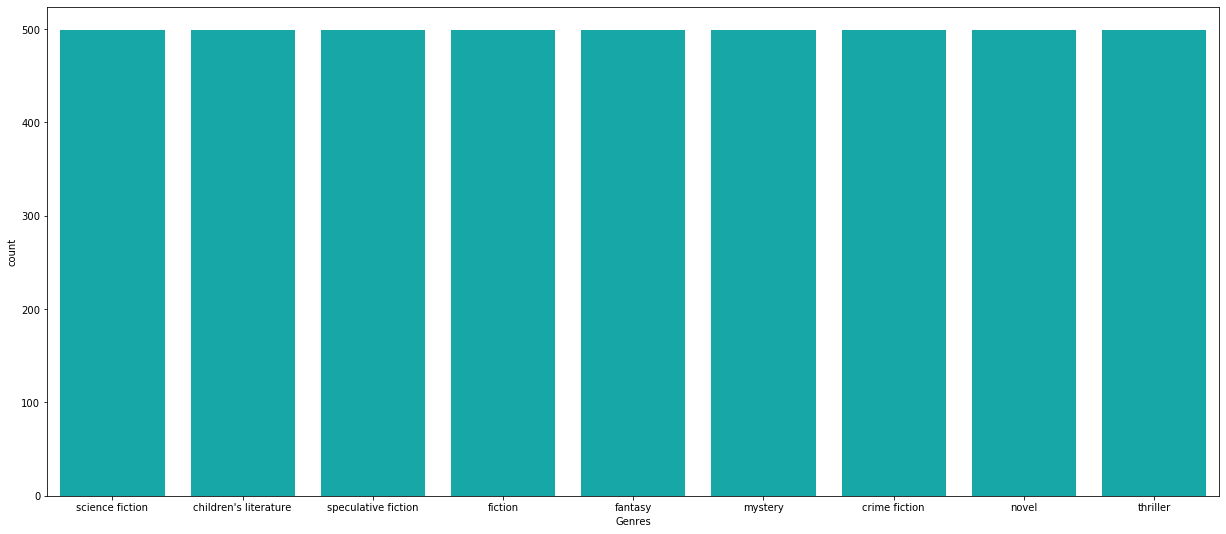

In [43]:
f, ax = plt.subplots(figsize=(21, 9))
sns.countplot(x="Genres", data=df, color="c");

In [44]:
df.to_csv('dataset1.csv')

In [45]:

def remove_stopwords(data):
    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(str(data))
    
    filtered_data = ""
    
    for w in word_tokens:
        if w not in stop_words and len(w)>1:
            filtered_data=filtered_data+" "+w
    return filtered_data
    
def remove_punctuation(data):
    marks="~!@#$%^&*()_+=-`[]\;'./{}|:<>?""'\n"
    
    for i in marks:
        data=np.char.replace(data,i,' ')
        data=np.char.replace(data,"  "," ")
    
    data=np.char.replace(data,",",'')
    return data

def remove_apostrophe(data):
    return np.char.replace(data, "'", "")


def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    
    new_text = ""
    
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    
    return new_text

def lemmatize(data):
    wnl=WordNetLemmatizer()
    tokens = word_tokenize(str(data))
    
    new_text = ""
    
    for w in tokens:
        new_text = new_text + " " + wnl.lemmatize(w)
    
    return new_text


def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

def preprocess(data):
    data=np.char.lower(data)
    
    data = remove_punctuation(data) #remove comma seperately
    
    data = remove_apostrophe(data)
    
    data = remove_stopwords(data)
    
    data = convert_numbers(data)
    
    data = stemming(data)
    
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = stemming(data) #needed again as we need to stem the words
    data = remove_punctuation(data) #needed again as num2word is giving few hypens and commas fourty-one
    data = remove_stopwords(data) #needed again as num2word is giving stop words 101 - one hundred and one
    return data


def preprocesswithoutstem(data):
    data=np.char.lower(data)
    
    data = remove_punctuation(data) #remove comma seperately
    
    data = remove_apostrophe(data)
    
    data = remove_stopwords(data)
    
    data = convert_numbers(data)
    
#     data = stemming(data)
    
    data = remove_punctuation(data)
#     data = stemming(data) #needed again as we need to stem the words
#     data = remove_punctuation(data)
    data = convert_numbers(data)
    data = remove_stopwords(data) #needed again as num2word is giving stop words 101 - one hundred and one
    return data


In [46]:
df.Summary=df.Summary.apply(preprocesswithoutstem)
df

,Name,Genres,Summary
1,A Clockwork Orange,science fiction,alex teenager living near future england lead...
6,A Wizard of Earthsea,children's literature,ged young boy gont one larger islands north a...
8,Blade Runner 3: Replicant Night,science fiction,living mars deckard acting consultant movie c...
9,Blade Runner 2: The Edge of Human,science fiction,beginning several months events blade runner ...
20,Crash,speculative fiction,story told eyes narrator james ballard named ...
...,...,...,...
14814,The Two Pearls of Wisdom,fantasy,eon studying ancient art dragon magic four ye...
14819,The Last Wizard,fantasy,essentially coming age teenage novel last wiz...
14845,Iorich,fantasy,aliera arrested practicing elder sorcery empi...
14862,Alice in Verse: The Lost Rhymes of Wonderland,fantasy,distinguishes variation lewis carroll classic...


In [47]:
df.to_csv('dataset2_withpreprocesswithoutstem.csv')

In [68]:
# df.Summary=df.Summary.apply(preprocess)
# df
# df.to_csv('dataset2_withpreprocess.csv')

Start executing from here------------>

In [48]:
df1=pd.read_csv('dataset2_withpreprocess.csv')
df1

,Unnamed: 0,Name,Genres,Summary
0,1,A Clockwork Orange,science fiction,alex teenag live near futur england lead gang...
1,6,A Wizard of Earthsea,children's literature,ged young boy gont one larger island north ar...
2,8,Blade Runner 3: Replicant Night,science fiction,live mar deckard act consult movi crew film s...
3,9,Blade Runner 2: The Edge of Human,science fiction,begin sever month event blade runner deckard ...
4,20,Crash,speculative fiction,stori told eye narrat jame ballard name autho...
...,...,...,...,...
4486,14814,The Two Pearls of Wisdom,fantasy,eon studi ancient art dragon magic four year ...
4487,14819,The Last Wizard,fantasy,essenti come age teenag novel last wizard fol...
4488,14845,Iorich,fantasy,aliera arrest practic elder sorceri empir pre...
4489,14862,Alice in Verse: The Lost Rhymes of Wonderland,fantasy,distinguish variat lewi carrol classic stori ...


In [49]:
df2=pd.read_csv('dataset2_withpreprocesswithoutstem.csv')
df2

,Unnamed: 0,Name,Genres,Summary
0,1,A Clockwork Orange,science fiction,alex teenager living near future england lead...
1,6,A Wizard of Earthsea,children's literature,ged young boy gont one larger islands north a...
2,8,Blade Runner 3: Replicant Night,science fiction,living mars deckard acting consultant movie c...
3,9,Blade Runner 2: The Edge of Human,science fiction,beginning several months events blade runner ...
4,20,Crash,speculative fiction,story told eyes narrator james ballard named ...
...,...,...,...,...
4486,14814,The Two Pearls of Wisdom,fantasy,eon studying ancient art dragon magic four ye...
4487,14819,The Last Wizard,fantasy,essentially coming age teenage novel last wiz...
4488,14845,Iorich,fantasy,aliera arrested practicing elder sorcery empi...
4489,14862,Alice in Verse: The Lost Rhymes of Wonderland,fantasy,distinguishes variation lewis carroll classic...


In [50]:
X1=df1.Summary
Y1=list(df1.Genres)
X2=df2.Summary
Y2=list(df2.Genres)

In [51]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state = 42)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state = 42)

Naive Bayes

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train1, Y_train1)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [54]:
from sklearn.metrics import classification_report
Y_pred1 = nb.predict(X_test1)

print('accuracy %s' % accuracy_score(Y_pred1, Y_test1))
print(classification_report(Y_test1, Y_pred1))

accuracy 0.505192878338279
                       precision    recall  f1-score   support

children's literature       0.62      0.43      0.50       155
        crime fiction       0.58      0.74      0.65       129
              fantasy       0.53      0.49      0.51       140
              fiction       0.36      0.64      0.46       157
              mystery       0.76      0.60      0.67       144
                novel       0.35      0.16      0.22       161
      science fiction       0.46      0.83      0.59       149
  speculative fiction       0.53      0.19      0.28       162
             thriller       0.55      0.56      0.55       151

             accuracy                           0.51      1348
            macro avg       0.53      0.51      0.49      1348
         weighted avg       0.52      0.51      0.49      1348



In [55]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train2, Y_train2)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [56]:
from sklearn.metrics import classification_report
Y_pred2 = nb.predict(X_test2)

print('accuracy %s' % accuracy_score(Y_pred2, Y_test2))
print(classification_report(Y_test2, Y_pred2))

accuracy 0.5059347181008902
                       precision    recall  f1-score   support

children's literature       0.56      0.44      0.49       155
        crime fiction       0.59      0.77      0.66       129
              fantasy       0.55      0.52      0.54       140
              fiction       0.33      0.62      0.43       157
              mystery       0.78      0.58      0.67       144
                novel       0.30      0.13      0.18       161
      science fiction       0.50      0.84      0.63       149
  speculative fiction       0.53      0.17      0.26       162
             thriller       0.59      0.57      0.58       151

             accuracy                           0.51      1348
            macro avg       0.52      0.52      0.49      1348
         weighted avg       0.52      0.51      0.48      1348



Linear Support Vector

In [57]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train1, Y_train1)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [58]:
y_pred3 = sgd.predict(X_test1)

print('accuracy %s' % accuracy_score(y_pred3, Y_test1))
print(classification_report(Y_test1, y_pred3))

accuracy 0.49629080118694363
                       precision    recall  f1-score   support

children's literature       0.50      0.45      0.47       155
        crime fiction       0.60      0.75      0.67       129
              fantasy       0.49      0.54      0.52       140
              fiction       0.37      0.38      0.37       157
              mystery       0.59      0.67      0.63       144
                novel       0.31      0.20      0.25       161
      science fiction       0.55      0.81      0.65       149
  speculative fiction       0.46      0.22      0.29       162
             thriller       0.51      0.54      0.52       151

             accuracy                           0.50      1348
            macro avg       0.49      0.51      0.49      1348
         weighted avg       0.48      0.50      0.48      1348



In [62]:
sgd.fit(X_train2, Y_train2)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [63]:
y_pred4 = sgd.predict(X_test2)

print('accuracy %s' % accuracy_score(y_pred4, Y_test2))
print(classification_report(Y_test2, y_pred4))

accuracy 0.49258160237388726
                       precision    recall  f1-score   support

children's literature       0.54      0.46      0.49       155
        crime fiction       0.56      0.74      0.64       129
              fantasy       0.50      0.55      0.52       140
              fiction       0.31      0.34      0.32       157
              mystery       0.57      0.65      0.60       144
                novel       0.28      0.20      0.24       161
      science fiction       0.57      0.82      0.67       149
  speculative fiction       0.47      0.21      0.29       162
             thriller       0.56      0.56      0.56       151

             accuracy                           0.49      1348
            macro avg       0.48      0.50      0.48      1348
         weighted avg       0.48      0.49      0.48      1348



Decision Tree

In [64]:
from sklearn import tree
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', tree.DecisionTreeClassifier()),
               ])
sgd.fit(X_train1, Y_train1)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
              

In [65]:
y_pred5 = sgd.predict(X_test1)
print('accuracy %s' % accuracy_score(y_pred5, Y_test1))
print(classification_report(Y_test1, y_pred5))

accuracy 0.28635014836795253
                       precision    recall  f1-score   support

children's literature       0.35      0.28      0.31       155
        crime fiction       0.32      0.44      0.37       129
              fantasy       0.19      0.19      0.19       140
              fiction       0.23      0.20      0.21       157
              mystery       0.31      0.38      0.34       144
                novel       0.22      0.22      0.22       161
      science fiction       0.47      0.48      0.47       149
  speculative fiction       0.22      0.20      0.21       162
             thriller       0.25      0.23      0.24       151

             accuracy                           0.29      1348
            macro avg       0.29      0.29      0.29      1348
         weighted avg       0.28      0.29      0.28      1348



In [66]:
sgd.fit(X_train2, Y_train2)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
              

In [67]:
y_pred6 = sgd.predict(X_test2)

print('accuracy %s' % accuracy_score(y_pred6, Y_test2))
print(classification_report(Y_test2, y_pred6))

accuracy 0.2663204747774481
                       precision    recall  f1-score   support

children's literature       0.23      0.26      0.24       155
        crime fiction       0.28      0.36      0.32       129
              fantasy       0.26      0.21      0.24       140
              fiction       0.20      0.22      0.21       157
              mystery       0.31      0.36      0.34       144
                novel       0.21      0.20      0.21       161
      science fiction       0.44      0.43      0.44       149
  speculative fiction       0.21      0.19      0.20       162
             thriller       0.25      0.19      0.21       151

             accuracy                           0.27      1348
            macro avg       0.27      0.27      0.27      1348
         weighted avg       0.27      0.27      0.26      1348

